In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn seaborn

In [4]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 11.3/11.3 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Implementing Feedforward neural networks with Keras and TensorFlow for
# classification of hand-written MNIST dataset using below steps:
# a. Import the necessary packages
# b. Load the training and testing data
# c. Define the network architecture using Keras
# d. Train the model using SGD with 11 epochs
# e. Evaluate the network
# f. Plot the training loss and accuracy

TensorFlow version: 2.20.0
Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


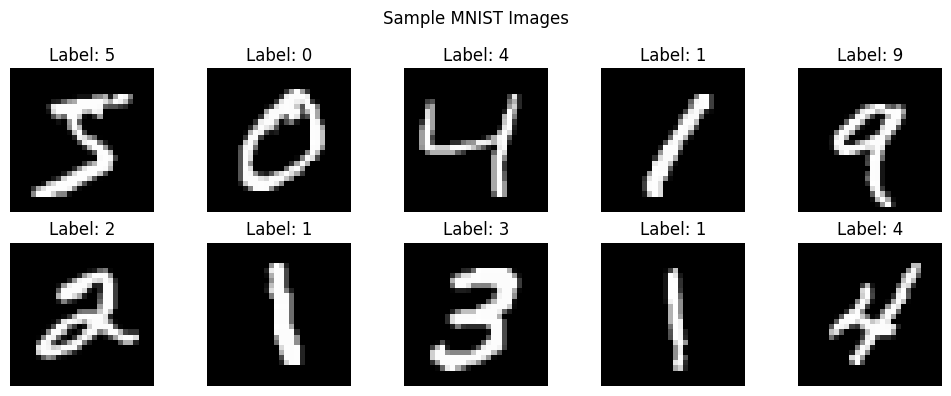

After flattening - Training data shape: (60000, 784)
One-hot encoded labels shape: (60000, 10)

MODEL ARCHITECTURE


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)


Model compiled with SGD optimizer

TRAINING THE MODEL
Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6189 - loss: 1.3413 - val_accuracy: 0.8548 - val_loss: 0.5336
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8413 - loss: 0.5404 - val_accuracy: 0.8948 - val_loss: 0.3633
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8743 - loss: 0.4252 - val_accuracy: 0.9114 - val_loss: 0.3073
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8905 - loss: 0.3711 - val_accuracy: 0.9208 - val_loss: 0.2755
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9039 - loss: 0.3316 - val_accuracy: 0.9274 - val_loss: 0.2494
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9106 - loss: 0.3039 - val_accuracy: 0.9331 - val_loss: 0.2292
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9175 - loss: 0.2798 - val_accuracy: 0.9375 - val_loss: 0.2130
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

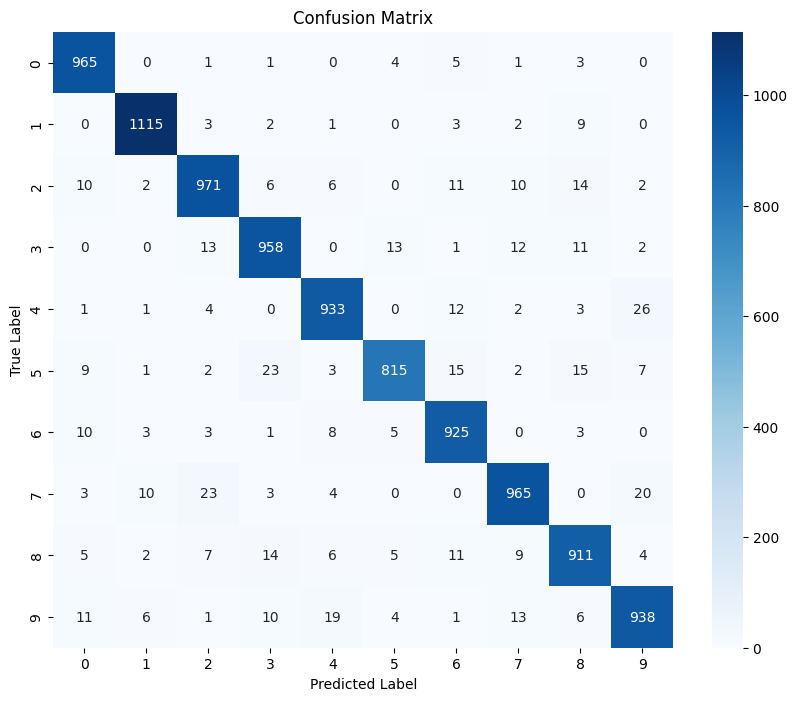

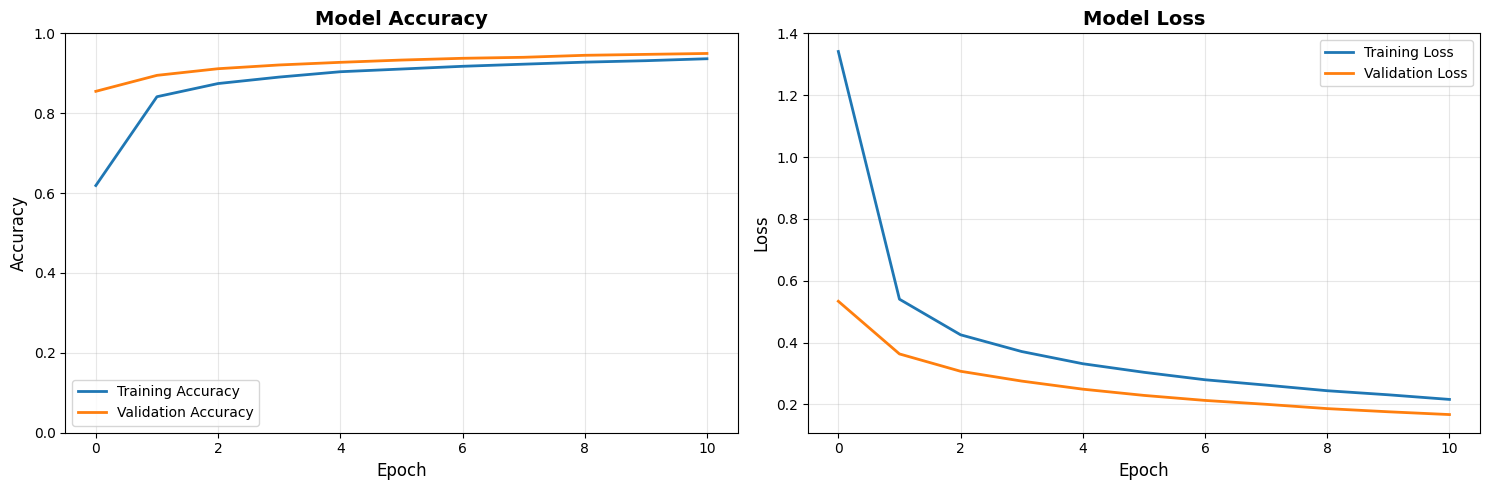


SAMPLE PREDICTIONS


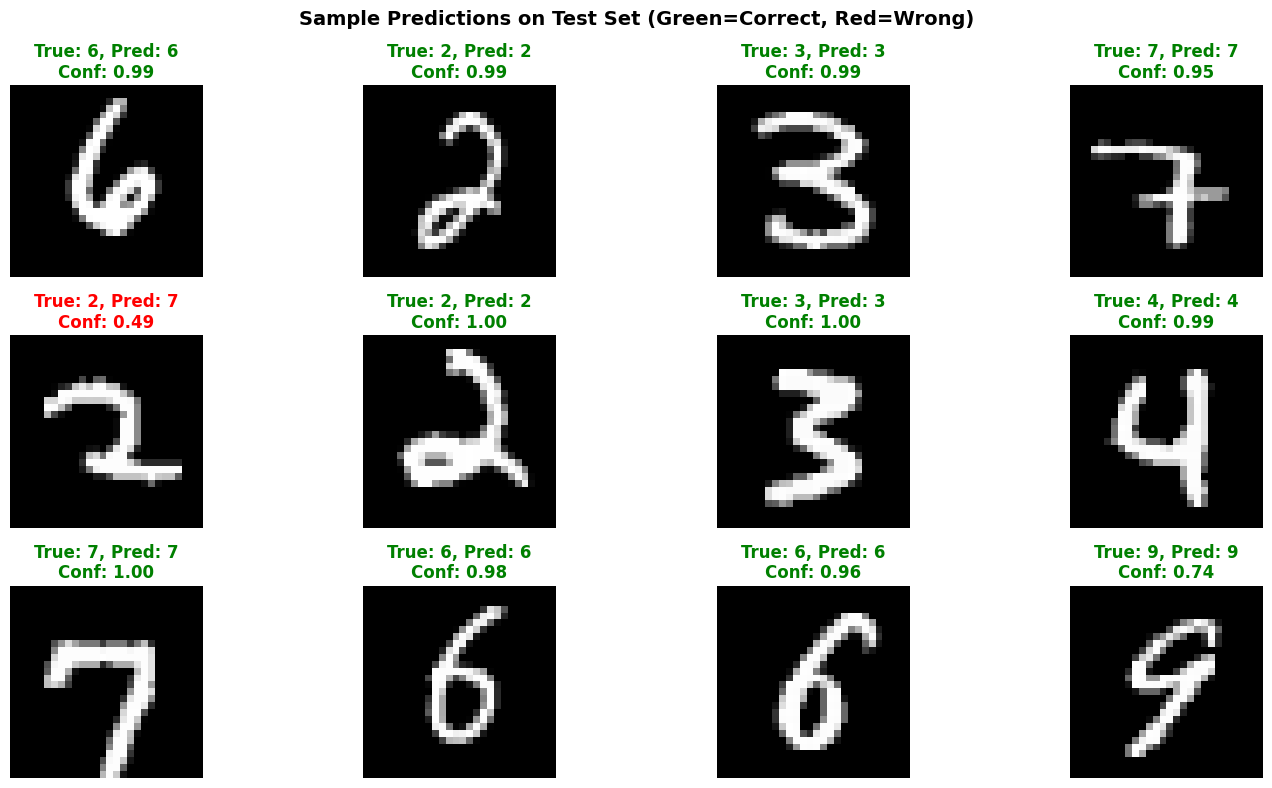


FINAL TRAINING SUMMARY
📊 Final Training Accuracy: 93.64%
📊 Final Validation Accuracy: 94.96%
📊 Final Test Accuracy: 94.96%
🔥 Total Parameters: 567,434


In [5]:
# ============================================================
# Implementing Feedforward Neural Network for MNIST Classification
# ============================================================

# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# b. Load the training and testing data
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.tight_layout()
plt.show()

# Preprocess the data
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train_flat = x_train.reshape((x_train.shape[0], 28*28))
x_test_flat = x_test.reshape((x_test.shape[0], 28*28))

print(f"After flattening - Training data shape: {x_train_flat.shape}")

# One-hot encode the labels
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_cat.shape}")

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Input(shape=(784,)),              # Input layer - flattened 28x28 images
    layers.Dense(512, activation='relu'),    # Hidden layer 1
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(256, activation='relu'),    # Hidden layer 2
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(128, activation='relu'),    # Hidden layer 3
    layers.Dense(10, activation='softmax')   # Output layer - 10 classes (0-9)
])

# Model summary
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
model.summary()

# Compile the model with SGD optimizer
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled with SGD optimizer")

# d. Train the model using SGD with 11 epochs
print("\n" + "="*50)
print("TRAINING THE MODEL")
print("="*50)

history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=128,
    epochs=11,  # 11 epochs as specified
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)

# e. Evaluate the network
print("\n" + "="*50)
print("EVALUATING THE NETWORK")
print("="*50)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# Make predictions on test set
predictions = model.predict(x_test_flat)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# f. Plot the training loss and accuracy
plt.figure(figsize=(15, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: Display some test predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Select random test samples
sample_indices = np.random.choice(len(x_test), 12, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]
    confidence = np.max(predictions[idx])
    
    # Color code: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}', 
              color=color, fontweight='bold')
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Set (Green=Correct, Red=Wrong)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*60)
print("FINAL TRAINING SUMMARY")
print("="*60)
print(f"📊 Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"📊 Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"📊 Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"🔥 Total Parameters: {model.count_params():,}")
print("="*60)

In [ ]:
# ============================================================
# Implementing Feedforward Neural Network for MNIST Classification
# Loading data from CSV files
# ============================================================

# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# b. Load the training and testing data from CSV files
def load_mnist_from_csv(train_csv_path, test_csv_path=None, label_column='label', image_shape=(28, 28)):
    """
    Load MNIST data from CSV files
    
    Parameters:
    - train_csv_path: Path to training CSV file
    - test_csv_path: Path to testing CSV file (optional)
    - label_column: Name of the label column
    - image_shape: Original image shape (height, width)
    """
    print(f"Loading training data from: {train_csv_path}")
    train_df = pd.read_csv(train_csv_path)
    
    # Check if label column exists
    if label_column not in train_df.columns:
        print(f"Warning: '{label_column}' column not found. Using last column as labels.")
        y_train = train_df.iloc[:, -1].values
        x_train = train_df.iloc[:, :-1].values
    else:
        y_train = train_df[label_column].values
        x_train = train_df.drop(columns=[label_column]).values
    
    if test_csv_path and os.path.exists(test_csv_path):
        print(f"Loading testing data from: {test_csv_path}")
        test_df = pd.read_csv(test_csv_path)
        
        if label_column not in test_df.columns:
            y_test = test_df.iloc[:, -1].values
            x_test = test_df.iloc[:, :-1].values
        else:
            y_test = test_df[label_column].values
            x_test = test_df.drop(columns=[label_column]).values
    else:
        print("No test file provided, splitting training data (80%/20%)...")
        x_train, x_test, y_train, y_test = train_test_split(
            x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
    
    # Reshape data back to image format for visualization
    x_train_images = x_train.reshape((-1,) + image_shape)
    x_test_images = x_test.reshape((-1,) + image_shape)
    
    return (x_train_images, y_train), (x_test_images, y_test), (x_train, x_test)

# Load data from CSV files
try:
    # Replace these paths with your actual CSV file paths
    train_csv_path = "mnist_train.csv"  # Your training CSV file
    test_csv_path = "mnist_test.csv"    # Your testing CSV file
    
    (x_train, y_train), (x_test, y_test), (x_train_flat, x_test_flat) = load_mnist_from_csv(
        train_csv_path=train_csv_path,
        test_csv_path=test_csv_path,
        label_column='label',  # Change to your label column name
        image_shape=(28, 28)
    )
    
    print("✅ Data successfully loaded from CSV files!")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Please make sure the CSV files exist in the correct path.")
    print("Falling back to Keras MNIST dataset...")
    from tensorflow.keras import datasets
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    x_train_flat = x_train.reshape((x_train.shape[0], 28*28))
    x_test_flat = x_test.reshape((x_test.shape[0], 28*28))

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)
print("Flattened training data shape:", x_train_flat.shape)

# Display sample images from CSV data
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images from CSV")
plt.tight_layout()
plt.show()

# Preprocess the data
# Normalize pixel values (0-255 -> 0-1)
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

# One-hot encode the labels
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_cat.shape}")
print("Data preprocessing completed!")

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Input(shape=(784,)),              # Input layer - flattened 28x28 images
    layers.Dense(512, activation='relu'),    # Hidden layer 1
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(256, activation='relu'),    # Hidden layer 2
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(128, activation='relu'),    # Hidden layer 3
    layers.Dense(10, activation='softmax')   # Output layer - 10 classes (0-9)
])

# Model summary
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
model.summary()

# Compile the model with SGD optimizer
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled with SGD optimizer")

# d. Train the model using SGD with 11 epochs
print("\n" + "="*50)
print("TRAINING THE MODEL")
print("="*50)

history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=128,
    epochs=11,  # 11 epochs as specified
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)

# e. Evaluate the network
print("\n" + "="*50)
print("EVALUATING THE NETWORK")
print("="*50)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# Make predictions on test set
predictions = model.predict(x_test_flat)
predicted_classes = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - CSV Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# f. Plot the training loss and accuracy
plt.figure(figsize=(15, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy (CSV Data)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss (CSV Data)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: Display some test predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Select random test samples
sample_indices = np.random.choice(len(x_test), 12, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]
    confidence = np.max(predictions[idx])
    
    # Color code: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}', 
              color=color, fontweight='bold')
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Set (Green=Correct, Red=Wrong) - CSV Data', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*60)
print("FINAL TRAINING SUMMARY - CSV DATA")
print("="*60)
print(f"📊 Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"📊 Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"📊 Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"🔥 Total Parameters: {model.count_params():,}")
print(f"📁 Data Source: CSV Files")
print("="*60)